In [29]:
import sys
import os

# Add the workspace directory to the system path
sys.path.append(os.path.abspath('..'))

# Now you should be able to import the class
from model import preprocess_data
from model.train import HST
import tensorflow as tf

In [2]:
%matplotlib inline

In [30]:
train_dataset, test_dataset = preprocess_data.load_data(data_path="/home/pbr-student/personal/thesis/test/PedestrianTrajectoryPrediction/df_jrdb_augmented.pkl", batch_size=32)

2024-07-30 17:15:38.278828: W tensorflow/core/framework/dataset.cc:956] Input of Window will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.
2024-07-30 17:16:08.282783: W tensorflow/core/framework/dataset.cc:956] Input of Window will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.
2024-07-30 17:16:38.284694: W tensorflow/core/framework/dataset.cc:956] Input of Window will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.
2024-07-30 17:17:08.288082: W tensorflow/core/framework/dataset.cc:956] Input of Window will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.
2024-07-30 17:17:38.296551: W tensorflow/core/framework/dataset.cc:956] Input of Window will not be optimized because the dataset does not implement the

In [31]:
len(train_dataset)

4418

In [14]:
tf.data.experimental.save(
    train_dataset, path= "../train_dataset"
)

Instructions for updating:
Use `tf.data.Dataset.save(...)` instead.


2024-07-29 12:06:40.020139: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1081514160 exceeds 10% of free system memory.


In [3]:
loaded = tf.data.experimental.load(
    "test_dataset"
)

Instructions for updating:
Use `tf.data.Dataset.load(...)` instead.


[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 17404134898602437468


In [9]:
len(loaded)

553

In [4]:
import datetime
import tensorflow as tf

model_base_dir = ""
dt_str = datetime.datetime.now().strftime('2024-07-15_15:57:20')
model_dir = os.path.join(model_base_dir, dt_str)
ckpt_dir = "/home/pbr-student/personal/thesis/test/PedestrianTrajectoryPrediction/latest/ckpts"
ckpt_best_dir = "/home/pbr-student/personal/thesis/test/PedestrianTrajectoryPrediction/2024-07-30_15:14:07/ckpts_best/ckpt"

def test_model(checkpoint_dir, test_dataset):
    
    model = HST(15)  # Initialize the model architecture
    optimizer = tf.keras.optimizers.Adam()
    
    # Create a checkpoint object
    checkpoint = tf.train.Checkpoint(model=model, optimizer=optimizer)
    
    # Restore the latest checkpoint
    latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
    if latest_checkpoint:
        checkpoint.restore(latest_checkpoint)
        print(f"Restored checkpoint from {latest_checkpoint}")
    else:
        print("No checkpoint found.")
        return
    
    # Run a forward pass with a batch from the test dataset
    for (batch_x1, batch_x2) in test_dataset.take(1):
        input_batch = (batch_x1, batch_x2)
        output = model(input_batch, training=False)
        #print(output)
        break
    return input_batch, output


In [5]:
input, pred = test_model(ckpt_best_dir, loaded)

Restored checkpoint from /home/pbr-student/personal/thesis/test/PedestrianTrajectoryPrediction/2024-07-30_15:14:07/ckpts_best/ckpt/ckpt-5
normalized input:  tf.Tensor(
[[[ 180.54001 -178.828    -20.764  ]
  [ 180.511   -178.80301  -20.764  ]
  [ 180.483   -178.778    -20.764  ]
  ...
  [   0.         0.         0.     ]
  [   0.         0.         0.     ]
  [   0.         0.         0.     ]]

 [[ 179.582   -178.913    -20.764  ]
  [ 179.435   -179.142    -20.764  ]
  [   0.         0.         0.     ]
  ...
  [   0.         0.         0.     ]
  [   0.         0.         0.     ]
  [   0.         0.         0.     ]]

 [[ 181.523   -172.923    -20.764  ]
  [ 181.45999 -173.494    -20.764  ]
  [ 181.396   -174.065    -20.764  ]
  ...
  [   0.         0.         0.     ]
  [   0.         0.         0.     ]
  [   0.         0.         0.     ]]

 ...

 [[ 180.52501 -173.08499  -20.764  ]
  [ 180.55101 -172.772    -20.764  ]
  [ 180.58    -172.473    -20.764  ]
  ...
  [   0.         0.

[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 17404134898602437468


In [20]:
pred["position"][0][:,0][:,0]

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([0.38908288, 0.3889858 , 0.38912395, 1.1934711 , 0.38907743,
       0.3890423 , 1.1931604 , 1.193429  , 1.193433  , 1.1933981 ,
       1.1935259 , 1.1932145 , 1.193502  , 1.1932628 , 1.193322  ],
      dtype=float32)>

In [23]:
pred["position"][0][:,0]

<tf.Tensor: shape=(15, 3), dtype=float32, numpy=
array([[ 0.38908288,  2.2347107 ,  0.12388305],
       [ 0.3889858 ,  2.234773  ,  0.12386729],
       [ 0.38912395,  2.2347155 ,  0.12389368],
       [ 1.1934711 ,  1.3703576 , -0.01878133],
       [ 0.38907743,  2.2346954 ,  0.12383871],
       [ 0.3890423 ,  2.2347302 ,  0.12389447],
       [ 1.1931604 ,  1.3705324 , -0.01874434],
       [ 1.193429  ,  1.370512  , -0.01883839],
       [ 1.193433  ,  1.370378  , -0.01870614],
       [ 1.1933981 ,  1.3703495 , -0.01874971],
       [ 1.1935259 ,  1.3703433 , -0.01876542],
       [ 1.1932145 ,  1.3706671 , -0.01879881],
       [ 1.193502  ,  1.3702363 , -0.01882724],
       [ 1.1932628 ,  1.3705846 , -0.01863917],
       [ 1.193322  ,  1.3703502 , -0.01878062]], dtype=float32)>

In [11]:
pred["targets"][0]

<tf.Tensor: shape=(15, 3), dtype=float32, numpy=
array([[ 0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     ],
       [ 1.8046 , -1.78696, -0.20764],
       [ 0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     ],
       [ 1.804  , -1.78353, -0.20764],
       [ 1.80375, -1.78002, -0.20764],
       [ 1.80367, -1.77788, -0.20764],
       [ 1.80359, -1.77574, -0.20764],
       [ 1.80356, -1.77327, -0.20764],
       [ 1.80353, -1.7708 , -0.20764],
       [ 1.80355, -1.76806, -0.20764],
       [ 1.80356, -1.76533, -0.20764],
       [ 1.80362, -1.76238, -0.20764]], dtype=float32)>

/tmp/ipykernel_22181/1852489297.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


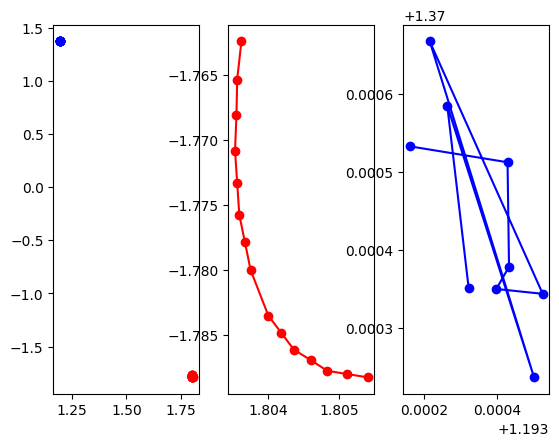

In [28]:
import matplotlib.pyplot as plt 
import numpy as np 

idx = 0
mode = 0

ground_truth = input[0][idx][:,:2].numpy()
prediction_x = pred["position"][idx][:,mode][:,0].numpy()
prediction_y = pred["position"][idx][:,mode][:,1].numpy()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.plot(ground_truth[:,0], ground_truth[:,1], 'ro-')
ax1.plot(prediction_x[6:], prediction_y[6:],'bo-')
ax2.plot(ground_truth[:,0], ground_truth[:,1], 'ro-')
ax3.plot(prediction_x[6:], prediction_y[6:],'bo-')
fig.show()

In [28]:
print(prediction)

[[-0.80088246  0.57724416]
 [-0.7366359   0.7022887 ]
 [-0.7366359   0.7022887 ]
 [-0.7366359   0.7022887 ]
 [-0.7366359   0.7022887 ]
 [-0.80088246  0.57724416]
 [-0.80088246  0.57724416]
 [-0.80088246  0.57724416]
 [-0.80088246  0.57724416]
 [-0.80088246  0.57724416]
 [-0.80088246  0.57724416]
 [-0.80088246  0.57724416]
 [-0.8008824   0.57724404]
 [-0.8008824   0.57724404]
 [-0.8008824   0.57724404]]


# Plot training loss

In [13]:
import pandas as pd

train_loss_dir = "/home/pbr-student/Downloads/train.csv"
eval_loss_dir = "/home/pbr-student/Downloads/eval.csv"

train_loss = pd.read_csv(train_loss_dir)
eval_loss = pd.read_csv(eval_loss_dir)

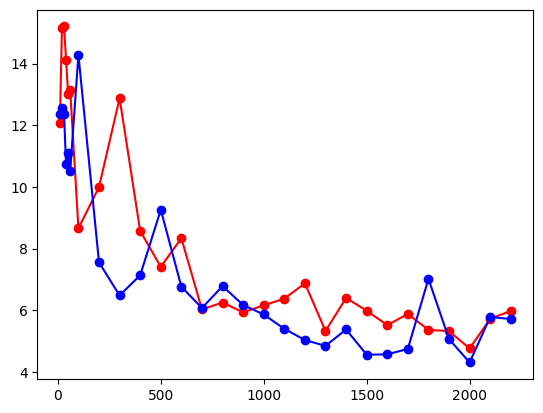

In [16]:
plt.plot(train_loss["Step"], train_loss["Value"], 'ro-')
plt.plot(eval_loss["Step"], eval_loss["Value"], 'bo-')
plt.show()

# Check intermediate layers

In [34]:
from keras import backend as K
model = HST(15)
inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functor = K.function([inp, K.learning_phase()], outputs )   # evaluation function

# Testing
for (batch_x1, batch_x2) in test_dataset.take(1):
    input_batch = (batch_x1, batch_x2)
    #output = model(input_batch, training=False)
    layer_outs = functor([input_batch, 1.])
    print(layer_outs)

AttributeError: Layer hst_9 is not connected, no input to return.

In [33]:
model = HST(15)  # Initialize the model architecture
optimizer = tf.keras.optimizers.Adam()

# Create a checkpoint object
checkpoint = tf.train.Checkpoint(model=model, optimizer=optimizer)
checkpoint_dir = "/home/pbr-student/personal/thesis/test/PedestrianTrajectoryPrediction/latest/ckpts"

# Restore the latest checkpoint
latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
if latest_checkpoint:
    checkpoint.restore(latest_checkpoint)

# Run a forward pass with a batch from the test dataset
for (batch_x1, batch_x2) in test_dataset.take(1):
    input_batch = (batch_x1, batch_x2)
    output = model(input_batch, training=False)
    #print(output)

2024-07-29 16:08:49.542748: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1081514160 exceeds 10% of free system memory.


In [ ]:
model = HST(15)

# Get intermediate layer outputs
intermediate_model = tf.keras.Model(inputs=model.input,
                                    outputs=model.get_layer('dense_layer_name').output)
intermediate_output = intermediate_model.predict(input_data)
print(intermediate_output)